In [ ]:
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Task 1 (Linear Filter)

For this task, use the image: "Fig0333(a)(test_pattern_blurring_orig)" from Chapter 03 zip

a) Implement the Smoothing Operation with Average Filter (Box & Weighted Average filters)

b) Change the user defined parameters to obtain different levels of blurring effects.


## Box Average Smoothing
Generally, a box average filter computes the mean of a neighborhood of pixels in the image for a specific pixel and replaces the value of that specific pixel with the computed mean value. For a $m \times n$ average filter, the computed pixel value is,
	\begin{equation}
	    p=\frac{1}{m \times n}\sum_{i=1}^{m}\sum_{j=1}^{n}w_{ij}
	\end{equation}
	where, $\forall i, j w_{ij}=1$. So, for a $3\times 3$ average filter, each of the cells will have $\frac{1}{9}$.
	\begin{equation}
	\frac{1}{9}\times
	    \begin{bmatrix}
        1 & 1 & 1\\
        1 & 1 & 1\\
        1 & 1 & 1
        \end{bmatrix}
	\end{equation}

In [ ]:
def average_smoothing(image, m):
    image_array = np.array(image)
    M, N = image_array.shape
    padding_dimensions = (M + m - 1, N + m - 1)
    image_originX, image_originY = (m//2, m//2)
    padded_image = np.zeros(padding_dimensions)
    padded_image[image_originX:image_originX + M,image_originY:image_originY + N] = image_array
    smoothed_image_array = np.zeros(image_array.shape)
    for i in range(0, M):
        for j in range(0, N):
            smoothed_image_array[i, j] = np.mean(padded_image[i:i + m, j:j + m])
    return smoothed_image_array

Here, I am padding the original image with 0's to ensure average smoothing of every single pixel of the image by placing the center of the filter on top of each pixel. Now, let's apply this smoothing technique on an image and see how it works. The image shown below is a $500\times500$ image. It consists of some shapes, alphabets and dot-filled noisy rectangles. Applying smoothing techniques on shapes and alphabets should blur their edges, and in the case of the dots, they should be blurry to the point of not being visible.

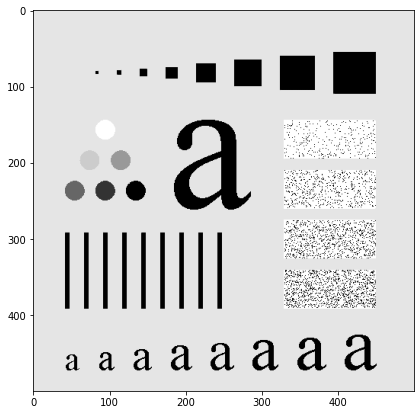

In [ ]:
test_pattern_blurring = Image.open('/content/drive/MyDrive/DIP3E_Original_Images_CH03/Fig0333(a)(test_pattern_blurring_orig).tif')
fig = plt.figure(figsize=(10, 7))
plt.imshow(test_pattern_blurring, origin='upper', cmap='gray')

In [ ]:
avg_smoothed_img1 = average_smoothing(test_pattern_blurring, m=3)
avg_smoothed_img2 = average_smoothing(test_pattern_blurring, m=5)
avg_smoothed_img3 = average_smoothing(test_pattern_blurring, m=9)
avg_smoothed_img4 = average_smoothing(test_pattern_blurring, m=15)
avg_smoothed_img5 = average_smoothing(test_pattern_blurring, m=35)

Here, I am taking square filter sizes of the form $m \times m$, with the values of $m$ being 3, 5, 9 15 and 35. The results look something like,

(-0.5, 499.5, 499.5, -0.5)

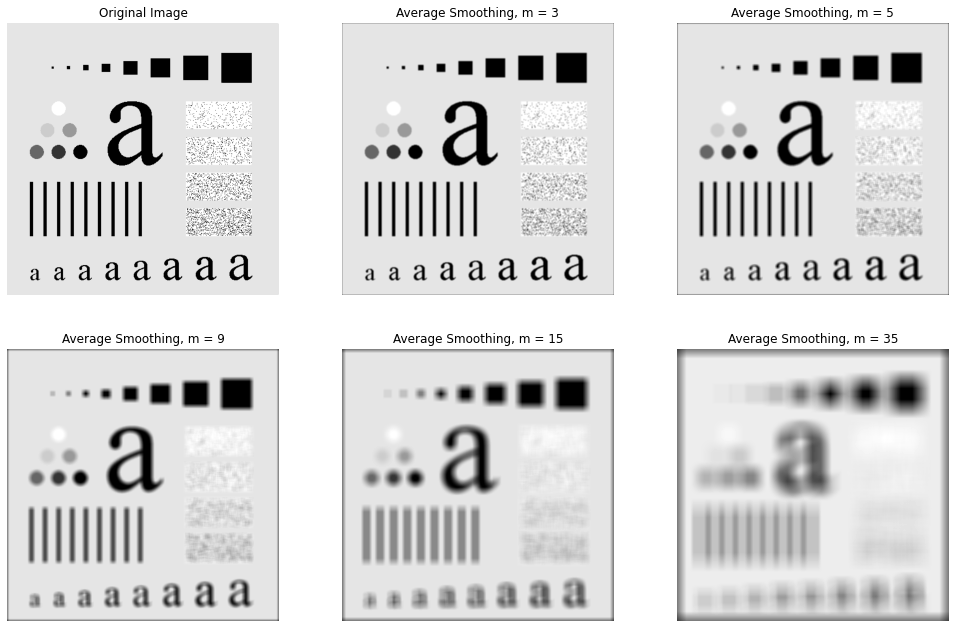

In [ ]:
fig = plt.figure(figsize=(17, 11))
fig.add_subplot(2, 3, 1)
plt.imshow(test_pattern_blurring, origin='upper', cmap='gray')
plt.title('Original Image')
plt.axis('off')

fig.add_subplot(2, 3, 2)
plt.imshow(avg_smoothed_img1, origin='upper', cmap='gray')
plt.title('Average Smoothing, m = 3')
plt.axis('off')

fig.add_subplot(2, 3, 3)
plt.imshow(avg_smoothed_img2, origin='upper', cmap='gray')
plt.title('Average Smoothing, m = 5')
plt.axis('off')

fig.add_subplot(2, 3, 4)
plt.imshow(avg_smoothed_img3, origin='upper', cmap='gray')
plt.title('Average Smoothing, m = 9')
plt.axis('off')

fig.add_subplot(2, 3, 5)
plt.imshow(avg_smoothed_img4, origin='upper', cmap='gray')
plt.title('Average Smoothing, m = 15')
plt.axis('off')

fig.add_subplot(2, 3, 6)
plt.imshow(avg_smoothed_img5, origin='upper', cmap='gray')
plt.title('Average Smoothing, m = 35')
plt.axis('off')

Now, empirically, we can observe that, in the results for $3\times3$ and $5\times5$ filters, the alphabets and the noisy rectangles show significant blurring. For $m=9$ and $m=15$, the circles seem barely visible. We can notice significant blackening of the image boundaries in the case of $m=15$ and $m=35$. This happens because of the zero padding done prior to convolving the original image with the filter. Since 0's represent black in the gray-scale, we see a black blend in the boundaries of the trimmed output images.

## Weighted Average Smoothing
Now, let's see how Weighted Average filters work. To be precise, we will be working with kernels for Gaussian Blurring. Gaussian filters require 3 properties which are, the central weight, the variance and the filter dimensions. The value of the cells adjacent to the central pixel is determined using the formula,
    \begin{equation}
        g(x,y)=K\times e^{-\frac{(x-x_0)^2+(y-y_0)^2}{2\sigma^2}}
    \end{equation}
where, $K$ is the central weight, $\sigma^2$ is the variance and $(x_0, y_0)$ is the coordinate of the central pixel of the filter. The Gaussian kernels of this type are circularly symmetric and isotropic.

In [ ]:
def weighted_average_smoothing(image, sigma=1, center_weight=4, filter_dimensions=(3,3)):
    filter = np.zeros(filter_dimensions)
    centerX = filter.shape[0]//2
    centerY = filter.shape[1]//2
    image_array = np.array(image)
    M, N = image_array.shape
    m = filter_dimensions[0]
    for i in range(0, m):
        for j in range(0, m):
            filter[i, j] = center_weight*np.exp(-((centerX-i)**2 + (centerY-j)**2)/(2*(sigma**2)))
    filter[centerX, centerY] = center_weight
    filter = filter/np.sum(filter)
    # print(filter)
    padding_dimensions = (M + m - 1, N + m - 1)
    image_originX, image_originY = (m//2, m//2)
    padded_image = np.zeros(padding_dimensions)
    padded_image[image_originX:image_originX + M, image_originY:image_originY + N] = image_array
    smoothed_image_array = np.zeros(image_array.shape)
    for i in range(0, M):
        for j in range(0, N):
            smoothed_image_array[i, j] = np.sum(padded_image[i:i + m, j:j + m] * filter)
    return smoothed_image_array

Now, let's apply it on the image shown above and see how it turns out. Intuitively, Gaussian kernels have to be larger than box filters to achieve the same degree of blurring since, box filters assign equal weights to all the pixels in a neighborhood whereas, Gaussian kernels apply less and less weight to pixels that are further from the central pixel.

In [ ]:
wavg_smoothed_img1 = weighted_average_smoothing(test_pattern_blurring, sigma=1, center_weight=4, filter_dimensions=(3,3))
wavg_smoothed_img2 = weighted_average_smoothing(test_pattern_blurring, sigma=2, center_weight=32, filter_dimensions=(9,9))
wavg_smoothed_img3 = weighted_average_smoothing(test_pattern_blurring, sigma=3.5, center_weight=1, filter_dimensions=(21,21))
wavg_smoothed_img4 = weighted_average_smoothing(test_pattern_blurring, sigma=7, center_weight=1, filter_dimensions=(43,43))

(-0.5, 499.5, 499.5, -0.5)

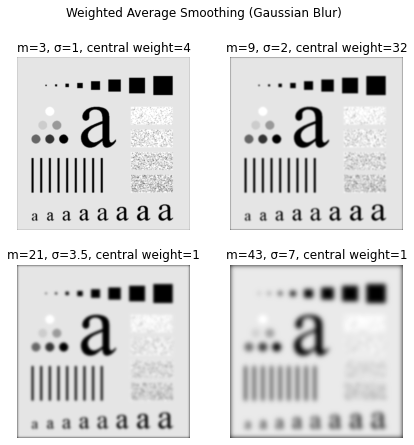

In [ ]:
fig = plt.figure(figsize=(7, 7))
fig.suptitle('Weighted Average Smoothing (Gaussian Blur)') 
fig.add_subplot(2, 2, 1)
plt.imshow(wavg_smoothed_img1, origin='upper', cmap='gray')
plt.title('m=3, σ=1, central weight=4')
plt.axis('off')

fig.add_subplot(2, 2, 2)
plt.imshow(wavg_smoothed_img2, origin='upper', cmap='gray')
plt.title('m=9, σ=2, central weight=32')
plt.axis('off')

fig.add_subplot(2, 2, 3)
plt.imshow(wavg_smoothed_img3, origin='upper', cmap='gray')
plt.title('m=21, σ=3.5, central weight=1')
plt.axis('off')

fig.add_subplot(2, 2, 4)
plt.imshow(wavg_smoothed_img4, origin='upper', cmap='gray')
plt.title('m=43, σ=7, central weight=1')
plt.axis('off')

Here, we can observe the outputs for different values of filter dimensions, variance and central weight in the case of Gaussian kernels. Although the images are blurred, they can be more coherently perceived compared to images blurred with box average filters. That is, around the edges of the alphabets and the geometric shapes, we can see a subtly better smoothing for Gaussian kernels. We can also see comparatively less blackening along the boundaries of the resultant images.

## Task 2 (Non-Linear Filter)
For this task, use the image : "Fig0335(a)(ckt_board_saltpep_prob_pt05)" from Chapter 03 zip

a) Use a function (built-in or your own) to artificially add noise to the image.

b) Implement the Noise (Salt&Pepper) Reduction technique using Median Filter ( or Max/Min)

c) Analyze the changes in result by varying the noise amount. Change filter size too.

Salt and pepper noise is a type of noise commonly seen in digital images. Generally, the images have a sparsely occurring manifestation of black and white pixels. Since, the white pixels look like salt, and the black pixels look like pepper, this type of noise is dubbed as Salt and Pepper Noise. This type of noise is generally implemented using some sort of probability distribution. For a given probability value $p$,
    \begin{equation}
        f(x,y)=
        \begin{cases}
            f(x,y),\text{ with probability }1-p\\
            0,\text{ with probability }\frac{p}{2}\\
            255,\text{ with probability }\frac{p}{2}
        \end{cases}
    \end{equation}
The higher the probability parameter $p$ is set, the greater the density of noise we see in the output image.

In [ ]:
import random
def custom_salt_and_pepper_noise(image, probability=0.05):
    image_array = np.array(image)
    M, N = image_array.shape
    random_image_array = np.random.choice(
        [0,1,np.nan],p=[probability/2, 1 - probability, probability/2], size=(M, N)
    )
    image_array = image_array.astype('float') * random_image_array
    # print(random_image_array)
    for i in range(0, M):
        for j in range(0, N):
            image_array[i, j] = image_array[i, j].astype('float') * random_image_array[i, j]
    image_array = np.nan_to_num(image_array, nan=255).astype('uint8')
    return image_array

Let's try it out on the image shown below and see how it works.

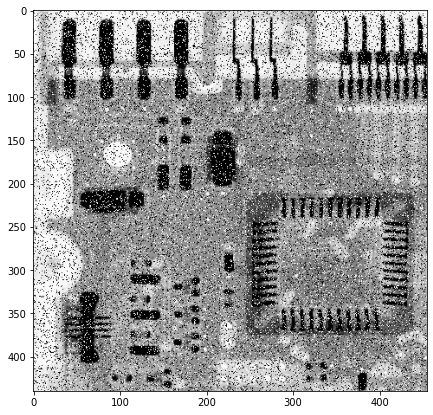

In [ ]:
ckt_board = Image.open('/content/drive/MyDrive/DIP3E_Original_Images_CH03/Fig0335(a)(ckt_board_saltpep_prob_pt05).tif')
fig = plt.figure(figsize=(10, 7))
plt.imshow(ckt_board, origin='upper', cmap='gray')

In [ ]:
noisy_img1 = custom_salt_and_pepper_noise(ckt_board)
noisy_img2 = custom_salt_and_pepper_noise(ckt_board, probability=0.1)
noisy_img3 = custom_salt_and_pepper_noise(ckt_board, probability=0.3)

(-0.5, 454.5, 439.5, -0.5)

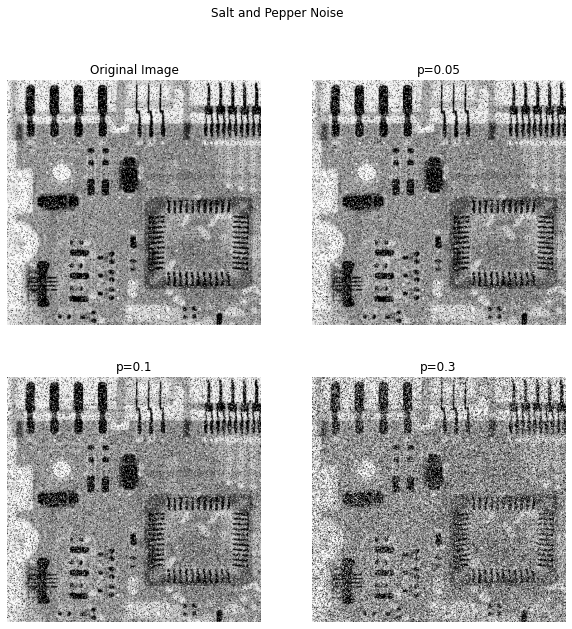

In [ ]:
fig = plt.figure(figsize=(10, 10))
fig.suptitle('Salt and Pepper Noise') 
fig.add_subplot(2, 2, 1)
plt.imshow(ckt_board, origin='upper', cmap='gray')
plt.title('Original Image')
plt.axis('off')

fig.add_subplot(2, 2, 2)
plt.imshow(noisy_img1, origin='upper', cmap='gray')
plt.title('p=0.05')
plt.axis('off')

fig.add_subplot(2, 2, 3)
plt.imshow(noisy_img2, origin='upper', cmap='gray')
plt.title('p=0.1')
plt.axis('off')

fig.add_subplot(2, 2, 4)
plt.imshow(noisy_img3, origin='upper', cmap='gray')
plt.title('p=0.3')
plt.axis('off')

As evident from the resultant images above, the more we increase the value of $p$, the more salt and pepper noise is introduced to the image.

The median filter uses the median of a neighborhood of pixel intensity values and replaces the central pixel's value with that median.

In [ ]:
def median_noise_reduction(image, m=3):
    image_array = np.array(image)
    M, N = image_array.shape
    padding_dimensions = (M + m - 1, N + m - 1)
    image_originX, image_originY = (m//2, m//2)
    padded_image = np.zeros(padding_dimensions)
    padded_image[image_originX:image_originX + M,image_originY:image_originY + N] = image_array
    smoothed_image_array = np.zeros(image_array.shape)
    for i in range(0, M):
        for j in range(0, N):
            smoothed_image_array[i, j] = np.median(padded_image[i:i + m, j:j + m])
    return smoothed_image_array

Now, let's apply it on the image shown above and see whether the noise is remedied.

In [ ]:
median_noise_reduced_img1 = median_noise_reduction(ckt_board, m=3)
median_noise_reduced_img2 = median_noise_reduction(ckt_board, m=5)

(-0.5, 454.5, 439.5, -0.5)

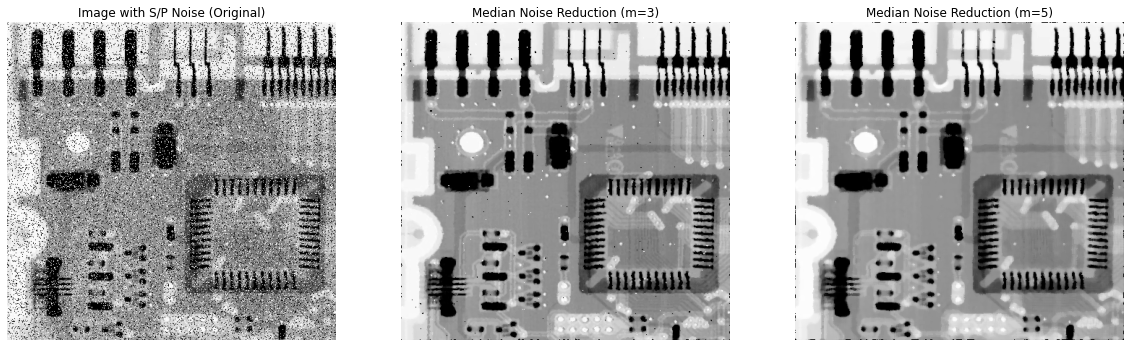

In [ ]:
fig = plt.figure(figsize=(20, 20))
fig.add_subplot(1, 3, 1)
plt.imshow(ckt_board, origin='upper', cmap='gray')
plt.title('Image with S/P Noise (Original)')
plt.axis('off')

fig.add_subplot(1, 3, 2)
plt.imshow(median_noise_reduced_img1, origin='upper', cmap='gray')
plt.title('Median Noise Reduction (m=3)')
plt.axis('off')

fig.add_subplot(1, 3, 3)
plt.imshow(median_noise_reduced_img2, origin='upper', cmap='gray')
plt.title('Median Noise Reduction (m=5)')
plt.axis('off')

As we can observe from the resultant images shown above, median filter yields excellent results for the corrupted image, especially the $5\times5$ filter. Median filters are quite popular for remedying certain types of random noise like salt and pepper noise because they provide excellent noise reduction capabilities with considerably less blurring than linear smoothing filters of similar size. We can achieve even better outputs if we perform multiple passes on an image with a median filter.

In [ ]:
median_noise_reduced_img3 = median_noise_reduction(noisy_img1, m=3)
median_noise_reduced_img4 = median_noise_reduction(noisy_img1, m=5)

Let's take a look at the outputs for the other images with even more noise.

(-0.5, 454.5, 439.5, -0.5)

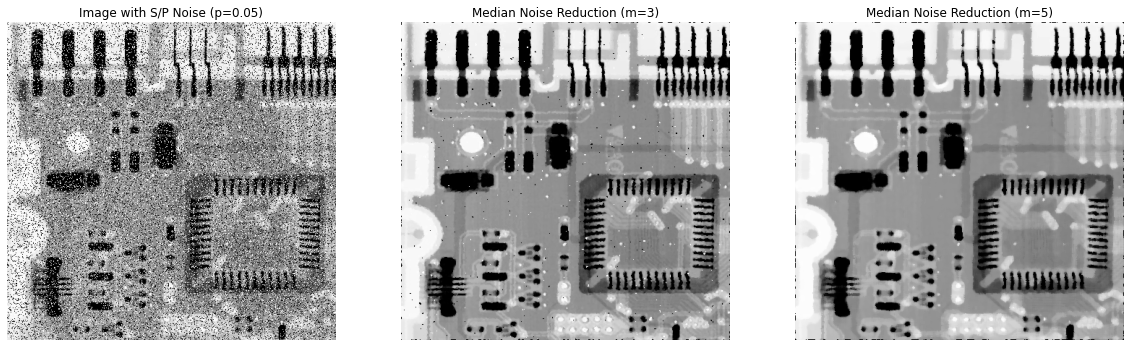

In [ ]:
fig = plt.figure(figsize=(20, 20))
fig.add_subplot(1, 3, 1)
plt.imshow(noisy_img1, origin='upper', cmap='gray')
plt.title('Image with S/P Noise (p=0.05)')
plt.axis('off')

fig.add_subplot(1, 3, 2)
plt.imshow(median_noise_reduced_img3, origin='upper', cmap='gray')
plt.title('Median Noise Reduction (m=3)')
plt.axis('off')

fig.add_subplot(1, 3, 3)
plt.imshow(median_noise_reduced_img4, origin='upper', cmap='gray')
plt.title('Median Noise Reduction (m=5)')
plt.axis('off')

In [ ]:
median_noise_reduced_img5 = median_noise_reduction(noisy_img2, m=3)
median_noise_reduced_img6 = median_noise_reduction(noisy_img2, m=5)

(-0.5, 454.5, 439.5, -0.5)

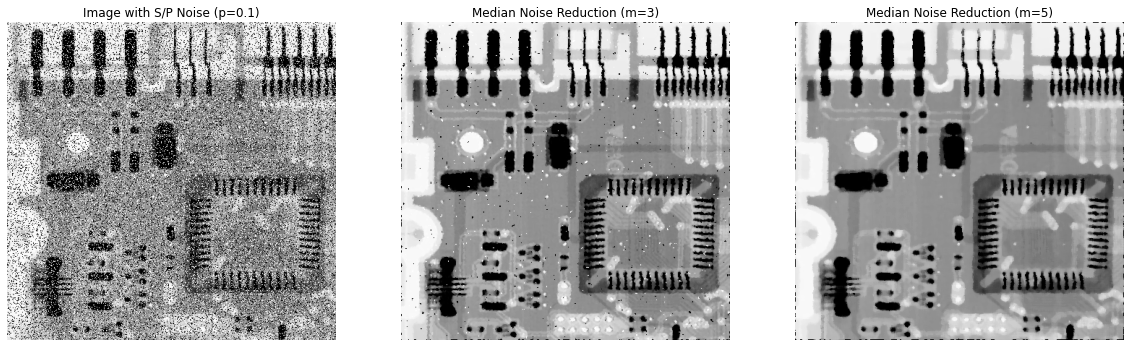

In [ ]:
fig = plt.figure(figsize=(20, 20))
fig.add_subplot(1, 3, 1)
plt.imshow(noisy_img2, origin='upper', cmap='gray')
plt.title('Image with S/P Noise (p=0.1)')
plt.axis('off')

fig.add_subplot(1, 3, 2)
plt.imshow(median_noise_reduced_img5, origin='upper', cmap='gray')
plt.title('Median Noise Reduction (m=3)')
plt.axis('off')

fig.add_subplot(1, 3, 3)
plt.imshow(median_noise_reduced_img6, origin='upper', cmap='gray')
plt.title('Median Noise Reduction (m=5)')
plt.axis('off')

In [ ]:
median_noise_reduced_img7 = median_noise_reduction(noisy_img3, m=3)
median_noise_reduced_img8 = median_noise_reduction(noisy_img3, m=5)

(-0.5, 454.5, 439.5, -0.5)

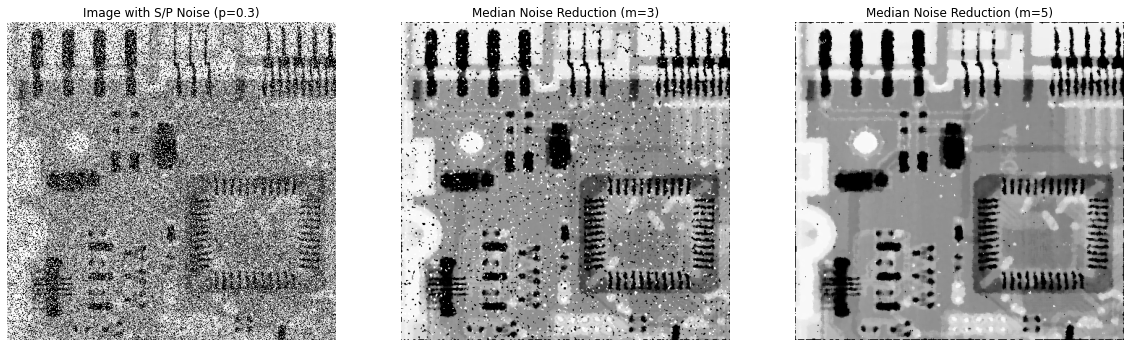

In [ ]:
fig = plt.figure(figsize=(20, 20))
fig.add_subplot(1, 3, 1)
plt.imshow(noisy_img3, origin='upper', cmap='gray')
plt.title('Image with S/P Noise (p=0.3)')
plt.axis('off')

fig.add_subplot(1, 3, 2)
plt.imshow(median_noise_reduced_img7, origin='upper', cmap='gray')
plt.title('Median Noise Reduction (m=3)')
plt.axis('off')

fig.add_subplot(1, 3, 3)
plt.imshow(median_noise_reduced_img8, origin='upper', cmap='gray')
plt.title('Median Noise Reduction (m=5)')
plt.axis('off')

We can empirically observe from the images above, even such a dense presence of salt and pepper noise can be retrieved and set right using median filter (especially the $5\times5$ filter). However, this removal of noise comes with an undesirable side-effect which makes the image deteriorate in quality. We can also see the prevalence of a lot of black pixels across the image boundaries. We know, by definition, that the median of a set of values is the middle element in the sorted order of those values. So, when we use zero padding during convolution, the prevalence of a lot of 0's along the border makes the median value 0 which is perceived as black in gray-scale images.

# Task 3 (Image Sharpening)
For this task, use the image : "Fig0338(a)(blurry_moon)"

a) Compute edge responses using Laplacian filter.

b) Display Laplacian image after scaling.

c) Produce the sharp output using Laplacian response: 

g = f + c x (f*w)
d) Vary user defined parameter c to obtain different levels of sharpness.

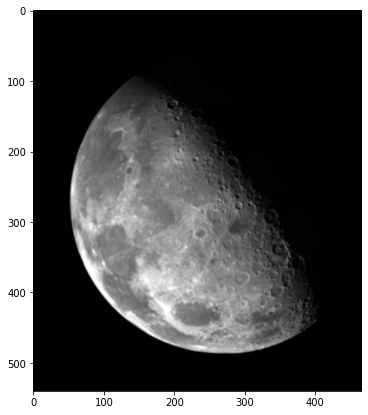

In [ ]:
blurry_moon = Image.open('/content/drive/MyDrive/DIP3E_Original_Images_CH03/Fig0338(a)(blurry_moon).tif')
fig = plt.figure(figsize=(10, 7))
plt.imshow(blurry_moon, origin='upper', cmap='gray')

The simplest isotropic derivative operator is the Laplacian operator. The general form is,
    \begin{equation}
    \begin{split}
        \nabla^2f(x,y)&=\frac{\partial^2f}{\partial x^2} + \frac{\partial^2f}{\partial y^2}\\
        &=f(x+1,y)+f(x-1,y)+f(x,y+1)+f(x,y-1)-4f(x,y)
    \end{split}
    \end{equation}
As Laplacian is a derivative operator, it highlights sharp intensity transitions in an image and de-emphasizes regions of slowly varying intensities. This will tend to produce images that have grayish edge lines and other discontinuities, all superimposed on a dark, featureless background. Overall, the usage of Laplacian for image sharpening is,
    \begin{equation}
        g(x,y)=f(x,y)+c[\nabla^2f(x,y)]
    \end{equation}
where $f(x,y)$ and $g(x,y)$ are the input and sharpened images, respectively.

Some examples of Laplacian kernels are,
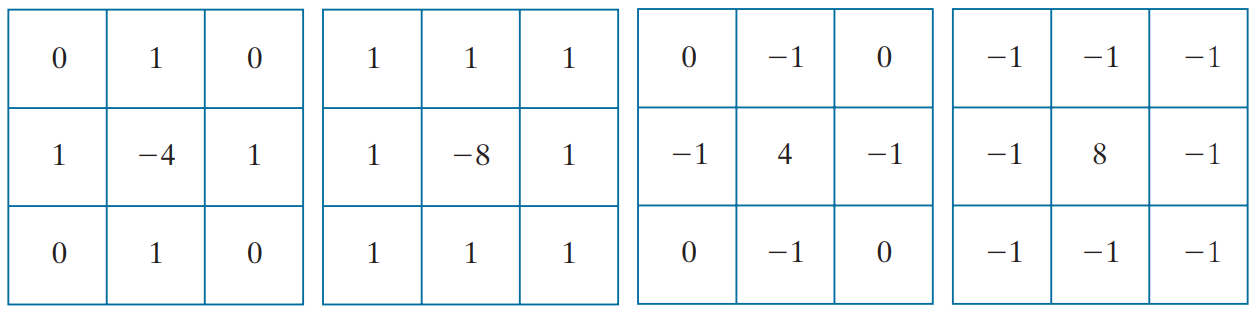

In [ ]:
filter1 = np.array([[0, 1, 0],
                    [1, -4, 1],
                    [0, 1, 0]])

filter2 = np.array([[1, 1, 1],
                    [1, -8, 1],
                    [1, 1, 1]])

filter3 = -filter1
filter4 = -filter2

In [ ]:
print(filter3)
print(filter4)

[[ 0 -1  0]
 [-1  4 -1]
 [ 0 -1  0]]
[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]


Let's use these kernels on a blurry image of the moon as shown above.

In [ ]:
def normalization(image, range=255):
     image_array = np.array(image)
     image_min = np.min(image_array)
     image_max = np.max(image_array)
     return Image.fromarray(np.uint8(((image_array - image_min)/(image_max - image_min)) * range))

In [ ]:
def laplacian_sharpening(image, filter, c=1):
    image_array = np.array(image)
    M, N = image_array.shape
    m = filter.shape[0]
    padding_dimensions = (M + m - 1, N + m - 1)
    image_originX, image_originY = (m//2, m//2)
    padded_image = np.zeros(padding_dimensions)
    padded_image[image_originX:image_originX + M, image_originY:image_originY + N] = image_array
    unscaled_response = np.zeros(image_array.shape)
    for i in range(0, M):
        for j in range(0, N):
            unscaled_response[i, j] = np.sum(padded_image[i:i + m, j:j + m] * filter)
    scaled_response = normalization(unscaled_response)
    factored_image = c * unscaled_response
    sharpened_image = factored_image + image_array
    sharpened_image[sharpened_image > 255] = 255
    sharpened_image[sharpened_image < 0] = 0
    return Image.fromarray(unscaled_response), scaled_response, Image.fromarray(sharpened_image)

In [ ]:
laplacian_responses = laplacian_sharpening(blurry_moon, filter=filter4)
laplacian_without_scaling = laplacian_responses[0]
laplacian_with_scaling = laplacian_responses[1]
sharpened_filter4 = laplacian_responses[2]
sharpened_filter3= laplacian_sharpening(blurry_moon, filter=filter3)[2]

(-0.5, 465.5, 539.5, -0.5)

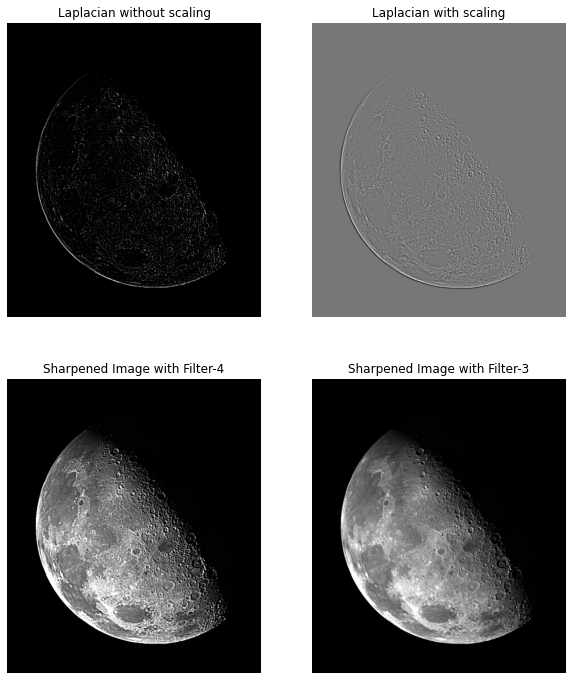

In [ ]:
fig = plt.figure(figsize=(10, 12))

fig.add_subplot(2, 2, 1)
plt.imshow(laplacian_without_scaling, origin='upper', cmap='gray')
plt.title('Laplacian without scaling')
plt.axis('off')

fig.add_subplot(2, 2, 2)
plt.imshow(laplacian_with_scaling, origin='upper', cmap='gray')
plt.title('Laplacian with scaling')
plt.axis('off')

fig.add_subplot(2, 2, 3)
plt.imshow(sharpened_filter4, origin='upper', cmap='gray')
plt.title('Sharpened Image with Filter-4')
plt.axis('off')

fig.add_subplot(2, 2, 4)
plt.imshow(sharpened_filter3, origin='upper', cmap='gray')
plt.title('Sharpened Image with Filter-3')
plt.axis('off')

In the figure above, we can see the aftermath of applying Filter-4 on the image, in which we obtain a very dark output image. This resultant image is predominantly dark due to the prevalence of both positive and negative values in the Laplacian filter. When the images are displayed, the negative values are clipped off at 0. The black background becomes grayish when properly scaled. The level of detail that can be observed from the sharpened image is indisputably better than the original image shown earlier. The sharpened output for Filter-4 is slightly better than that of Filter-3 because Filter-4 provides additional differentiation (sharpening) along the diagonal directions.

Now, let's tinker around and tweak the value of $c$ in the Laplacian sharpening equation and observe the different outcomes.

In [ ]:
sharpened_filter11= laplacian_sharpening(blurry_moon, filter=filter1, c=2)[2]
sharpened_filter12= laplacian_sharpening(blurry_moon, filter=filter1, c=-2)[2]

sharpened_filter21= laplacian_sharpening(blurry_moon, filter=filter2, c=2)[2]
sharpened_filter22= laplacian_sharpening(blurry_moon, filter=filter2, c=-2)[2]

sharpened_filter31= laplacian_sharpening(blurry_moon, filter=filter3, c=2)[2]
sharpened_filter32= laplacian_sharpening(blurry_moon, filter=filter3, c=-2)[2]

sharpened_filter41= laplacian_sharpening(blurry_moon, filter=filter4, c=2)[2]
sharpened_filter42= laplacian_sharpening(blurry_moon, filter=filter4, c=-2)[2]

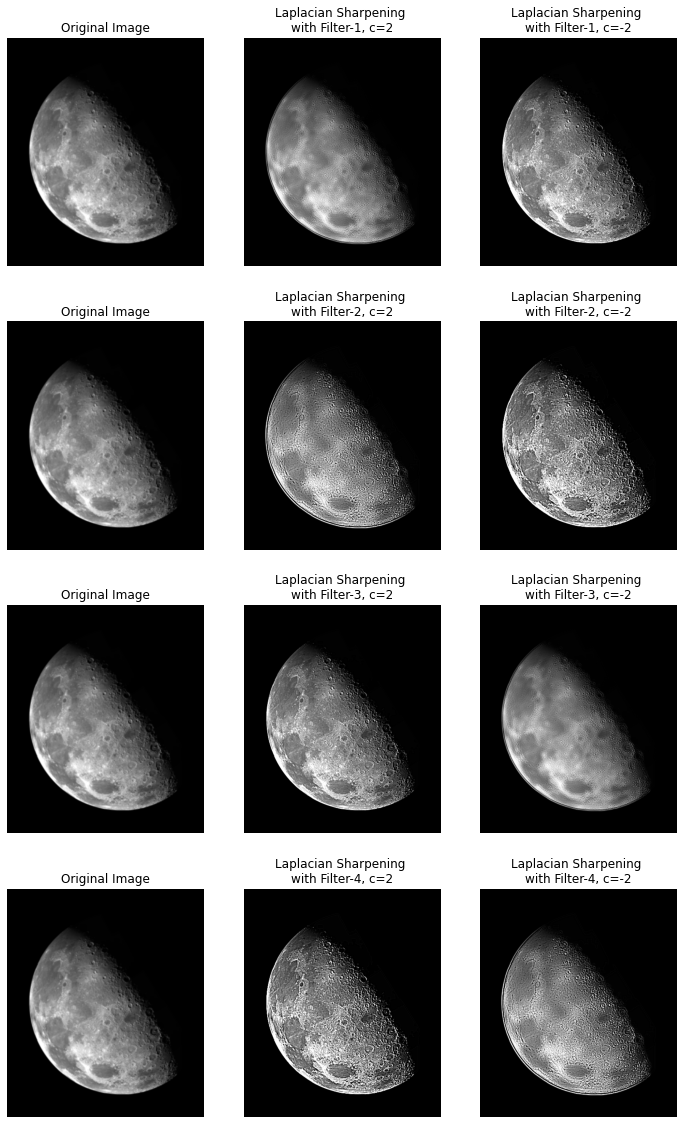

In [ ]:
sharpened_images = [sharpened_filter11, sharpened_filter12, sharpened_filter21, sharpened_filter22, sharpened_filter31, sharpened_filter32, sharpened_filter41, sharpened_filter42]
fig = plt.figure(figsize=(12, 20))

for i in range(0, len(sharpened_images)//2):
    fig.add_subplot(4, 3, 3*i+1)
    plt.imshow(blurry_moon, origin='upper', cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    fig.add_subplot(4, 3, 3*i+2)
    plt.imshow(sharpened_images[2*i], origin='upper', cmap='gray')
    plt.title(f'Laplacian Sharpening \nwith Filter-{i+1}, c=2')
    plt.axis('off')

    fig.add_subplot(4, 3, 3*i+3)
    plt.imshow(sharpened_images[2*i+1], origin='upper', cmap='gray')
    plt.title(f'Laplacian Sharpening \nwith Filter-{i+1}, c=-2')
    plt.axis('off')

Here, we can see that for positive value of $c$ in Filter-1 and 2 and negative value of $c$ in Filter-3 and 4, we get a peculiar blurring effect instead of sharpening effect. Although the phenomenon here has some subtle portions sharpened, majority of the image loses contrast, thus giving off a blurry appearance. To understand this more concretely, we need to invoke the concept of unsharp mask here. When we deduct a blurry signal from the original signal, what we are left with is called the unsharp mask. When this unsharp mask is added with the original image, we end up with an even sharper version of the image because the overall contrast has increased.

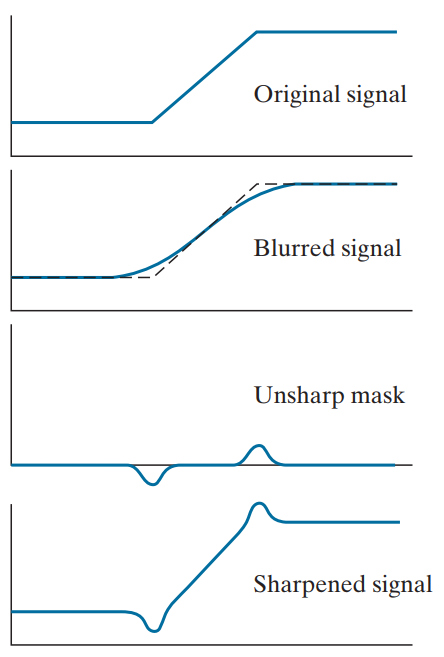

On the other hand, if the unsharp mask is negated, what we end up with is a flipped version of the previous unsharp mask. When that mask is added with the original image, the part of the image that represents edges (and parts that are supposed to be emphasized for better sharpening), get blurred due to low contrast, whereas, the parts of the image that doesn't need to be emphasized gets sharpened. This produces a peculiar blurry effect shown in the images above. Let's further increase and decrease the value of $c$ and see what happens to the output images below.

In [ ]:
sharpened_filter111= laplacian_sharpening(blurry_moon, filter=filter1, c=3)[2]
sharpened_filter122= laplacian_sharpening(blurry_moon, filter=filter1, c=-3)[2]

sharpened_filter211= laplacian_sharpening(blurry_moon, filter=filter2, c=3)[2]
sharpened_filter222= laplacian_sharpening(blurry_moon, filter=filter2, c=-3)[2]

sharpened_filter311= laplacian_sharpening(blurry_moon, filter=filter3, c=3)[2]
sharpened_filter322= laplacian_sharpening(blurry_moon, filter=filter3, c=-3)[2]

sharpened_filter411= laplacian_sharpening(blurry_moon, filter=filter4, c=3)[2]
sharpened_filter422= laplacian_sharpening(blurry_moon, filter=filter4, c=-3)[2]

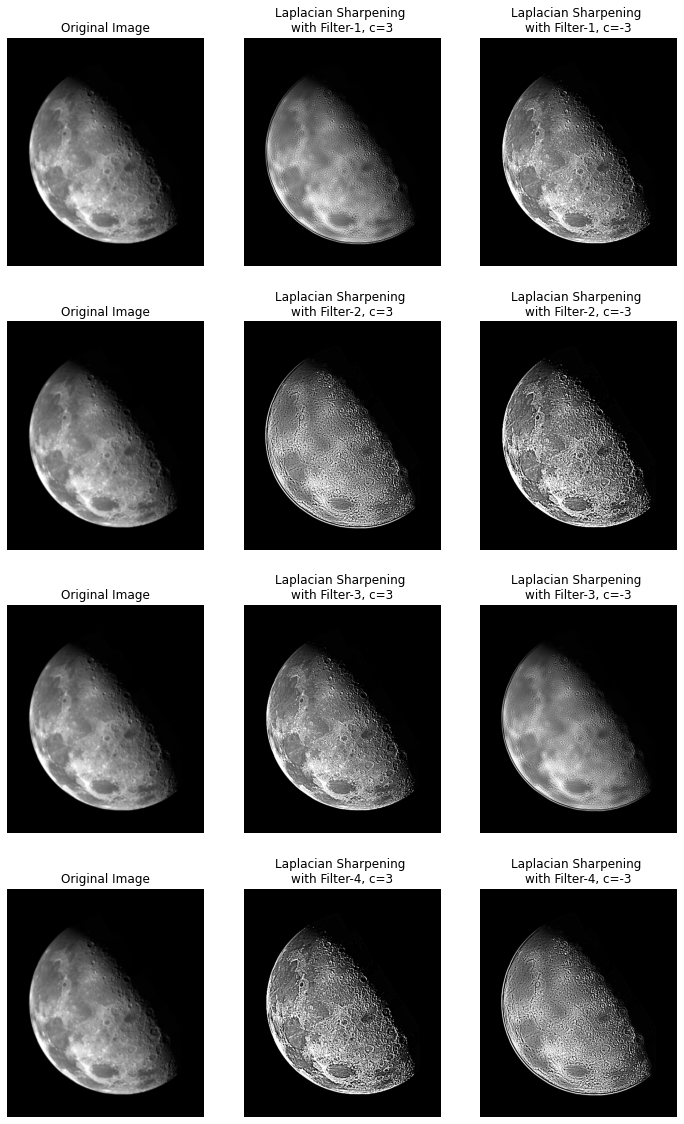

In [ ]:
sharpened_images2 = [sharpened_filter111, sharpened_filter122, sharpened_filter211, sharpened_filter222, sharpened_filter311, sharpened_filter322, sharpened_filter411, sharpened_filter422]
fig = plt.figure(figsize=(12, 20))

for i in range(0, len(sharpened_images2)//2):
    fig.add_subplot(4, 3, 3*i+1)
    plt.imshow(blurry_moon, origin='upper', cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    fig.add_subplot(4, 3, 3*i+2)
    plt.imshow(sharpened_images2[2*i], origin='upper', cmap='gray')
    plt.title(f'Laplacian Sharpening \nwith Filter-{i+1}, c=3')
    plt.axis('off')

    fig.add_subplot(4, 3, 3*i+3)
    plt.imshow(sharpened_images2[2*i+1], origin='upper', cmap='gray')
    plt.title(f'Laplacian Sharpening \nwith Filter-{i+1}, c=-3')
    plt.axis('off')

Here, we can observe that the concept still holds for varying values of $c$. For the negative-type kernels (having negative central pixel), we see a peculiar blurry effect and for the positive-type kernels (having positive central pixel), we get excellent image sharpness that brings out the inherent details of the original image.